In [1]:
#TASK-1: 
#SPLITTING DATA

import pandas as pd
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep = ';')

import numpy as np
wine['quality'] = np.where(wine['quality'] >5 ,1,2)

inputs = wine.iloc[:,:-1]
target = wine.iloc[:,-1]
print(' Input shape:',inputs.shape,'\n','Target shape:',target.shape)


from sklearn.model_selection import train_test_split
#first split
x_tr1,xte,y_tr1,yte = train_test_split(inputs,target,test_size = 0.2, random_state = 534,shuffle = True)
#second split
x_tr2,xval,y_tr2,yval = train_test_split(x_tr1,y_tr1, test_size = 0.25, random_state = 534, shuffle = True)

print(' x_tr1 :',x_tr1.shape,'\n','y_tr1 :',y_tr1.shape,'\n','x_tr2 :',x_tr2.shape,'\n','y_tr2 :',y_tr2.shape,'\n','xte   :',xte.shape,'\n','yte   :',yte.shape,'\n','xval  :',xval.shape,'\n','yval  :',yval.shape)

 Input shape: (1599, 11) 
 Target shape: (1599,)
 x_tr1 : (1279, 11) 
 y_tr1 : (1279,) 
 x_tr2 : (959, 11) 
 y_tr2 : (959,) 
 xte   : (320, 11) 
 yte   : (320,) 
 xval  : (320, 11) 
 yval  : (320,)


In [2]:
#Task-2:
    #a:perform PCA on Training data (I)


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#scaling the training data (I)
scaled_param_x_tr1 = StandardScaler().fit(x_tr1)
scaled_x_tr1 = scaled_param_x_tr1.transform(x_tr1)
#scaled_xval = scaled_param_x_tr1.transform(xval)
#scaled_xte = scaled_param_x_tr1.transform(xte)

#fitting the parameters on Training data(I)
pca_tr1 = PCA()
pca_x_tr1 = pca_tr1.fit_transform(scaled_x_tr1)


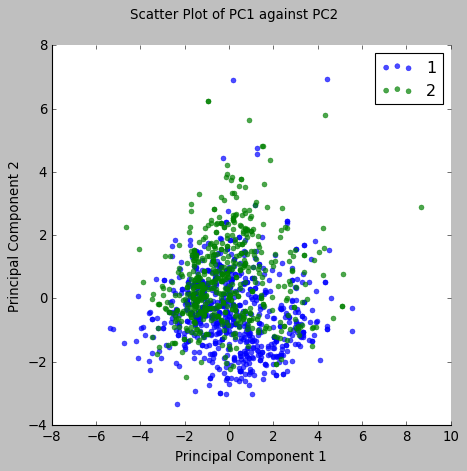

In [3]:
#b:Plotting PC1 against PC2
import seaborn as sns
import matplotlib.pyplot as plt

c = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pca_x_tr1_graph = pd.DataFrame(pca_x_tr1)
pca_x_tr1_graph.columns = c
pca_x_tr1_graph['pred'] = y_tr1.reset_index(drop=True,inplace=False)



plt.style.use('classic')
ag = sns.lmplot('pc1', # Horizontal axis
           'pc2', # Vertical axis
           data=pca_x_tr1_graph, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='pred',
                legend=False,
           height = 6,
           aspect= 1,
             scatter_kws={"marker": "D", # Set marker style
                        "s": 20,'alpha':0.7 })
plt.subplots_adjust(top=0.9)
ag.fig.suptitle("Scatter Plot of PC1 against PC2")#title
ag.set(xlabel='Principal Component 1', ylabel='Principal Component 2')
plt.legend(loc = 'best')
plt.savefig('pc1&pc2.png')

plt.show()


In [4]:
#c:reporting the variance captured by each PrincipalComponent



Principalcomponents = pd.DataFrame(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
Principalcomponents.columns = ['PrincipalComponents']
Principalcomponents['ExplainedVariance'] = pd.DataFrame(pca_tr1.explained_variance_)
Principalcomponents['Ratio %']=pd.DataFrame(pca_tr1.explained_variance_ratio_*100)
Principalcomponents


,PrincipalComponents,ExplainedVariance,Ratio %
0,PC1,3.066738,27.857635
1,PC2,1.897836,17.239566
2,PC3,1.598124,14.517041
3,PC4,1.255125,11.401306
4,PC5,0.940272,8.541240
5,PC6,0.671165,6.096726
6,PC7,0.578564,5.255564
7,PC8,0.416093,3.779704
8,PC9,0.341400,3.101213
9,PC10,0.180204,1.636939


In [5]:
'''learning curve for varying training size'''
#https://www.youtube.com/watch?v=02soMdTCMQo

'learning curve for varying training size'

In [6]:
#Task-3:Classification using Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(penalty='l2',
                            tol=0.0001,
                            C = 10,random_state=534,
                            solver='liblinear',
                            max_iter=15)
lg = logreg.fit(x_tr1,y_tr1)

print('accuracy ',lg.score(x_tr1,y_tr1))
y_pred = lg.predict(x_tr1)
print('anotheracc',metrics.accuracy_score(y_tr1,y_pred))

accuracy  0.7568412822517592
anotheracc 0.7568412822517592


D:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [7]:
#Task-3b: defining own function for False positives and False negatives

def misPatterns(predictions,labels):
    
    predictions = pd.DataFrame(predictions)
    labels = labels.reset_index(drop=True,inplace = False)
    y = pd.concat([predictions,labels], axis=1)
    
    FP = 0 
    FN = 0 
    for i in range(len(predictions)):
        #if y_predicted[i] == y_actual[i] == 1:
            #TP += 1
        if y.iloc[:,0][i]==2 and y.iloc[:,1][i] == 1:
            FP += 1
        #if y_predicted[i]== y_actual[i] == 0:
            #TN += 1
        if y.iloc[:,0][i]==1 and y.iloc[:,1][i] == 2:
            FN += 1
    return(FP,FN)

In [8]:
#Task-3c: training the model and reporting the performance on the test set

num1, num2 = misPatterns(y_pred,y_tr1)
print('Training Set:')
print(' Accuracy:',lg.score(x_tr1,y_tr1)*100,'%')
num1,num2 = misPatterns(y_pred,y_tr1)
print(' Label 1 and Prediction 2:',num1,'\n','Label 2 and Prediction 1:',num2,'\n','\n')

y_pred_test = lg.predict(xte)
print('Test Set:')
print(' Accuracy:',lg.score(xte,yte)*100,'%')
num1test,num2test = misPatterns(y_pred_test,yte)
print(' Label 1 and Prediction 2:',num1test,'\n','Label 2 and Prediction 1:',num2test)

Training Set:
 Accuracy: 75.68412822517591 %
 Label 1 and Prediction 2: 159 
 Label 2 and Prediction 1: 152 
 

Test Set:
 Accuracy: 71.5625 %
 Label 1 and Prediction 2: 39 
 Label 2 and Prediction 1: 52


In [9]:
#Task-4a: Learning curve for training size against accuracy

logreg_tr2 = LogisticRegression(penalty='l2',
                            tol=0.0001,
                            C = 1,random_state=534,
                            solver='liblinear',
                            max_iter=15)
lg_tr2 = logreg_tr2.fit(x_tr2,y_tr2)

from sklearn.model_selection import learning_curve

train_sizes,train_scores,test_scores = learning_curve(logreg_tr2,x_tr2,y_tr2,
                                       cv=5,
                                       scoring='accuracy',
                                       random_state= 534,
                                       train_sizes=np.linspace(0.01,1,100),
                                       shuffle=True,
                                       n_jobs = -1,
                                        verbose = True)

[learning_curve] Training set sizes: [  7  15  23  30  38  46  53  61  69  76  84  92  99 107 115 122 130 138
 145 153 161 168 176 184 191 199 207 214 222 230 237 245 253 260 268 276
 283 291 299 306 314 322 329 337 345 352 360 368 375 383 391 398 406 414
 421 429 437 444 452 460 467 475 483 490 498 506 513 521 529 536 544 552
 559 567 575 582 590 598 605 613 621 628 636 644 651 659 667 674 682 690
 697 705 713 720 728 736 743 751 759 767]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished


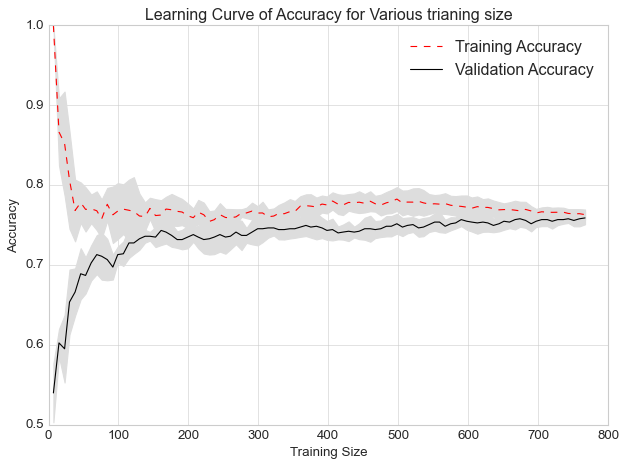

In [10]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores,axis =1)

train_error = 1-train_scores
test_error = 1-test_scores

train_error_mean = np.mean(train_error, axis = 1)
test_error_mean = np.mean(test_error, axis = 1)

train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores,axis = 1)

plt.style.use('seaborn-whitegrid')
plt.plot(train_sizes,train_mean,'--',color = 'red',label = "Training Accuracy ")
plt.plot(train_sizes,test_mean,color='black',label = "Validation Accuracy")


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title('Learning Curve of Accuracy for Various trianing size')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.savefig('lclog.png')
plt.tight_layout()
plt.show()

In [11]:
#Task4-b: Finding the best training data size


size = pd.DataFrame()
ts = pd.DataFrame(train_sizes)
size = ts.head(70)
size.columns = ['training_size']

size['tr_acc'] = pd.DataFrame(train_mean).head(70)
size['te_acc'] = pd.DataFrame(test_mean).head(70)

size['x'] = (size['tr_acc'] - size['te_acc'])
print(size[size['x']== size['x'].min()])

print('\n','\n','The ab0ve mentioned is the best training size because it has the lowest gap between the validation accuracy and the training accuracy, if we continue further with training the model it gets complex.')


<ipython-input-11-7ca0ace31815>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size['tr_acc'] = pd.DataFrame(train_mean).head(70)
<ipython-input-11-7ca0ace31815>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size['te_acc'] = pd.DataFrame(test_mean).head(70)


    training_size   tr_acc   te_acc        x
40            314  0.76051  0.74663  0.01388

 
 The ab0ve mentioned is the best training size because it has the lowest gap between the validation accuracy and the training accuracy, if we continue further with training the model it gets complex.


<ipython-input-11-7ca0ace31815>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size['x'] = (size['tr_acc'] - size['te_acc'])


In [12]:
#Task-4c: Reporting the performance on test set using the model with best size 

x_train2_best_size = x_tr2[:314]
y_train2_best_size = y_tr2[:314]

logreg_best = LogisticRegression()
lg_tr_best = logreg_best.fit(x_train2_best_size,y_train2_best_size)

y_pred_best = lg_tr_best.predict(xte)


num1best,num2best = misPatterns(y_pred_best,yte)
print('Trained with best training size:','\n','\n')
print(' Accuracy:',lg_tr_best.score(xte,yte)*100,'%')
num1best,num2best = misPatterns(y_pred_best,yte)
print(' Label 1 and Prediction 2:',num1best,'\n','Label 2 and Prediction 1:',num2best)

Trained with best training size: 
 

 Accuracy: 69.375 %
 Label 1 and Prediction 2: 42 
 Label 2 and Prediction 1: 56


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#Task-5a: PCA on training set II
from sklearn.decomposition import PCA


scaled_param_x_tr2 = StandardScaler().fit(x_tr2)
scaled_x_tr2 = scaled_param_x_tr2.transform(x_tr2)

scaled_x_te = scaled_param_x_tr2.transform(xte)
scaled_x_val = scaled_param_x_tr2.transform(xval)
pca2 = PCA()

pca2.fit(scaled_x_tr2)
pca_x_tr2 = pca2.transform(scaled_x_tr2)


#print('The required projected training set II is:','\n', pd.DataFrame(pca_x_tr2))

In [14]:
#Task-5b:Learning Curve

trainacc = []
valacc= []

ncomps = [1,2,3,4,5,6,7,8,9,10,11]
for ncomp in ncomps:

    pca = PCA(n_components=ncomp).fit(scaled_x_tr2)


    xtr = pca.transform(scaled_x_tr2)
    x_val = pca.transform(scaled_x_val)


    logit = LogisticRegression(solver='liblinear')
    logit.fit(xtr,y_tr2)

    ypred = logit.predict(xtr)

    train_accuracy = logit.score(xtr,y_tr2)
    val_accuracy = logit.score(x_val,yval)

    trainacc.append(train_accuracy)
    valacc.append(val_accuracy)


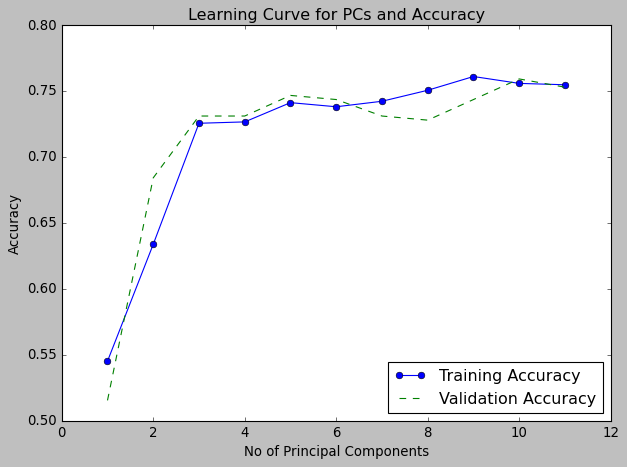

In [15]:

    p = pd.DataFrame()
    trainacc = pd.DataFrame(trainacc)
    valacc = pd.DataFrame(valacc)

    p['No of Comps'] = ncomps
    p['Training Accuracy'] = trainacc
    p['Validation Accuracy'] = valacc


    import matplotlib.pyplot as plt

    plt.style.use('classic')
    plt.plot(p.iloc[:,0],p.iloc[:,1],'o-',color = 'b',label = 'Training Accuracy')
    plt.plot(p.iloc[:,0],p.iloc[:,-1],'--',color = 'g',label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')
    plt.xlabel('No of Principal Components')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve for PCs and Accuracy')
    plt.savefig('lcPC.png')
    plt.tight_layout()
    plt.show()

In [16]:
#Task-5c
print(p,'\n')
print('In the above table and the Learning curve we can find that','\n',' after PC5 the increase in accuracy is very minor.','\n',' Hence we select 5 PCs')

    No of Comps  Training Accuracy  Validation Accuracy
0             1           0.545360             0.515625
1             2           0.633994             0.684375
2             3           0.725756             0.731250
3             4           0.726799             0.731250
4             5           0.741397             0.746875
5             6           0.738269             0.743750
6             7           0.742440             0.731250
7             8           0.750782             0.728125
8             9           0.761210             0.743750
9            10           0.755996             0.759375
10           11           0.754953             0.753125 

In the above table and the Learning curve we can find that 
  after PC5 the increase in accuracy is very minor. 
  Hence we select 5 PCs


In [17]:
#Task-5d: Performance on test set using 5 PCs

scaler = StandardScaler().fit(x_tr2)
scaled_x_tr2 = scaler.transform(x_tr2)
scaled_xte = scaler.transform(xte)


pca = PCA(n_components=5).fit(scaled_x_tr2)
pca_x_tr2 = pca.transform(scaled_x_tr2)
pca_x_te = pca.transform(scaled_x_te)

logtest = LogisticRegression().fit(pca_x_tr2,y_tr2)
yp_pred = logtest.predict(pca_x_te)
print('Accuracy:',logtest.score(pca_x_te,yte),'\n')
num1pca,num2pca = misPatterns(yp_pred,yte)
print(' Label 1 and Prediction 2:',num1pca,'\n','Label 2 and Prediction 1:',num2pca)

Accuracy: 0.69375 

 Label 1 and Prediction 2: 44 
 Label 2 and Prediction 1: 54
